In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Fourier Method
In this tutorial, we'll first talk about two points:
1. How to approximate a given function.
2. How to solve PDE with the Fourier trial functions
## Approximation of a given function $u(x)$
Let us suppose a function $u(x)$ which is defined in $0\leq x \leq 2\pi$ and has a periodicity $2\pi$. We want to approximate it by the truncated series
\begin{equation}
    u_K(x) = \sum_{k=-K}^{K}\hat{u}_k e^{ikx}
\end{equation}
As a result, the residual is 
\begin{equation}
    R_K = u(x) - u_K(x)
\end{equation}
With different test functions, we have different methods to get the coefficients in the truncated series. An interesting note is that $u(x)$ is a real function so the coefficients are symmetry
\begin{equation}
    \hat{u}_k = \overline{\hat{u}_k}
\end{equation}
### Galerkin method
In this method, the test function is the same as the trial functions thus
the residual is set to zero in the average sense
\begin{equation}
    (R_K,e^{ilx}) = 0, \quad l=-K,\dots,K
\end{equation}
Where the inner product is defined by
\begin{equation}
    (u,v) = \int_0^{2\pi}u\bar{v}dx
\end{equation}
Such that the residual
\begin{equation}
        (R_K,e^{ilx}) = \int_{0}^{2\pi} (u-u_K)e^{-ilx}dx = 0
\end{equation}
\begin{equation}
    \int_{0}^{2\pi} \sum_{k=-K}^{K}\hat{u}_k e^{ikx} e^{-ilx}dx = \int_{0}^{2\pi} ue^{-ilx}dx
\end{equation}
\begin{equation}
    2\pi \hat{u}_k = \int_{0}^{2\pi} ue^{-ikx}dx
\end{equation}
\begin{equation}
     \hat{u}_k = \frac{1}{2\pi}\int_{0}^{2\pi} ue^{-ikx}dx
\end{equation}
As the first example, 
\begin{equation}
    u(x) = \sin x + \sin 3x = \frac{e^{xi} - e^{-xi}}{2i} + \frac{e^{3xi} - e^{-3xi}}{2i}
\end{equation}
According to the orthogonality property, only coefficients $\hat{u}_{\pm 1}$ and $\hat{u}_{\pm 3}$ are non-zero
\begin{equation}
    \hat{u}_{1}=\hat{u}_{3}=-\frac{1}{2}i
\end{equation}
\begin{equation}
    \hat{u}_{-1}=\hat{u}_{-3}=\frac{1}{2}i
\end{equation}

<IPython.core.display.Javascript object>


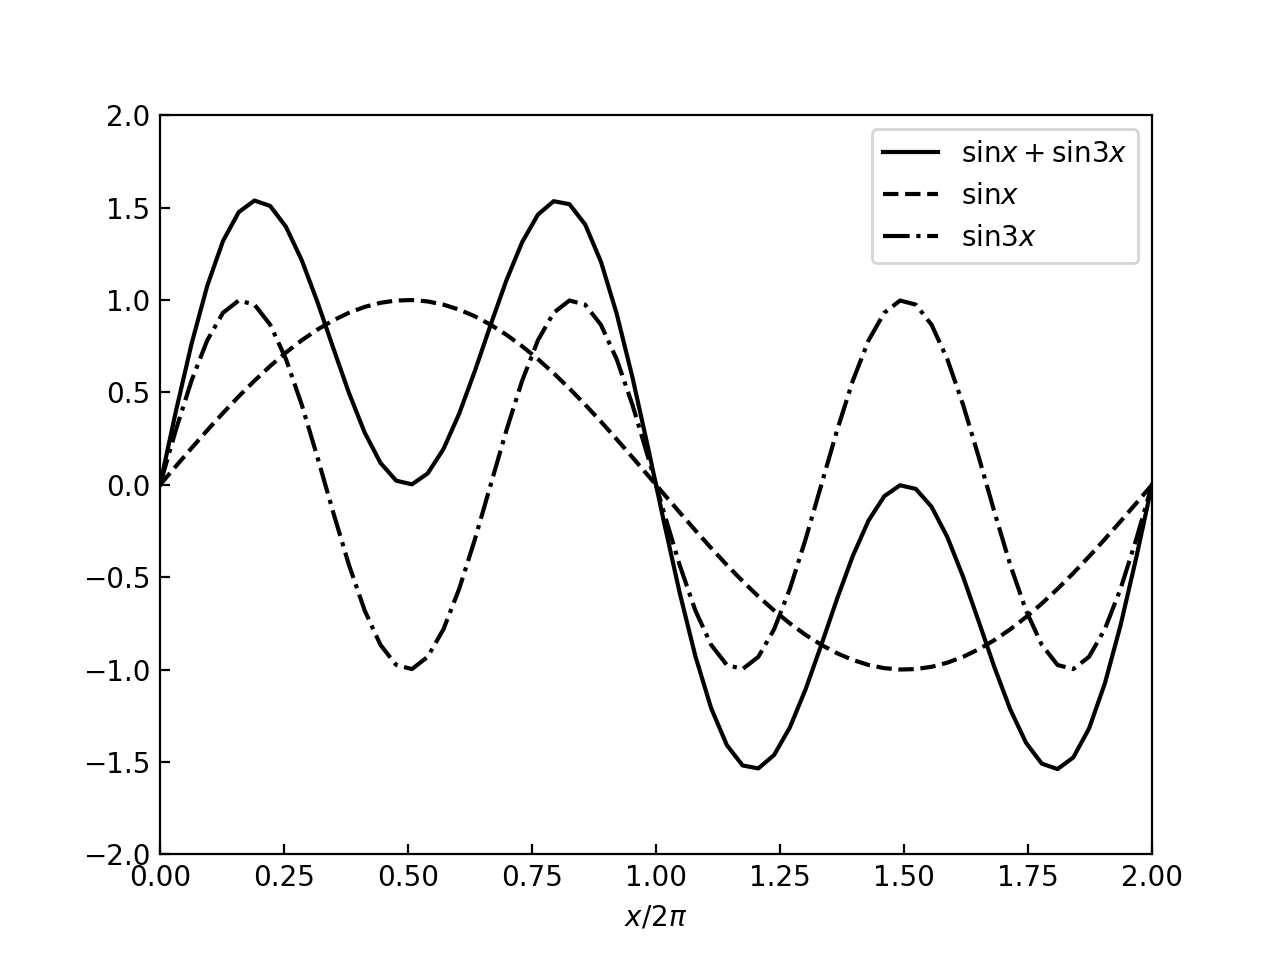

In [2]:
N = 64
x = np.linspace(0,2.*np.pi,N)
u = np.sin(x) + np.sin(3.*x)
plt.figure()
plt.subplot(111)
plt.plot(x/np.pi,u,color='black',label='$\sin x + \sin 3x$')
plt.plot(x/np.pi,np.sin(x),color='black',linestyle='--',label='$\sin x$')
plt.plot(x/np.pi,np.sin(3.*x),color='black',linestyle='-.',label='$\sin 3x$')

plt.xlabel('$x/2\pi$')

plt.xlim(0,2)
plt.ylim(-2.,2.)
plt.tick_params(direction='in')

plt.legend()

### Collocation Method
The collocation points associated with the Fourier series are defined by
\begin{equation}
    x_i = \frac{2\pi i}{N}, \quad i = 0,\dots,N
\end{equation}
s.t. $x_0=0$ and $x_N=2\pi$. As for the periodicity, $u(x_0)=u(x_N)$. And the residual $R_K(x)$ is zero at the collocation points
\begin{equation}
    \sum_{k=-K}^{K} \hat{u}_ke^{ikx_i} = u(x_i), \quad i=1,\dots,N
\end{equation}
There are $2k+1$ unknowns in the above equations so $N=2K+1$. Finally, the discrete Fourier transform(DFT) is
\begin{equation}
    \hat{u}_k = \frac{1}{N} \sum_{i=1}^{N}u(x_i)e^{-ikx_i}, \quad k=-K,\dots,K
\end{equation}

In [18]:
def generateWave(N):
    return np.linspace(-(N-1)//2,(N-1)//2,N)

In [19]:
def dft_my(u,x,wavenumber):
    N = wavenumber.size
    uhat = np.zeros(N,dtype=np.complex)
    for i in range(N):
        k = wavenumber[i]
        for j in range(1,N+1):
            uhat[i] += u[j]*np.exp(-1j*k*x[j])
        
    uhat /= N
    
    return uhat

In [24]:
def idft_my(uhat,wavenumber,x):
    N = wavenumber.size
    u = np.zeros(N+1,dtype=np.complex)
    for i in range(N):
        u += uhat[i]*np.exp(1.j*wavenumber[i]*x)
        
    return u
    

In [26]:
K = 4
N = 2*K + 1
x = np.linspace(0,2.*np.pi,N+1)
u = np.sin(x) + np.sin(3.*x)
print("Original collocation points and the function values")
print("i =    x_i =     u_i=  ")
for i in range(N+1):
    print("%d    %7.3f   %7.3f" % (i, x[i], u[i]))

print("Wavenumber and coefficients")
wavenumber = generateWave(N)
uhat = dft_my(u,x,wavenumber)
for i in range(N):
    print("%2d  %15.7f %15.7f" % (wavenumber[i], uhat[i].real, uhat[i].imag))
    
# Pefrom backward fft
utest = idft_my(uhat,wavenumber,x)
for i in range(N+1):
    print("%d    %7.3f   %7.3f   %7.3f" % (i, x[i], utest[i].real, utest[i].imag))

Original collocation points and the function values
i =    x_i =     u_i=  
0      0.000     0.000
1      0.698     1.509
2      1.396     0.119
3      2.094     0.866
4      2.793     1.208
5      3.491    -1.208
6      4.189    -0.866
7      4.887    -0.119
8      5.585    -1.509
9      6.283    -0.000
Wavenumber and coefficients
-4        0.0000000      -0.0000000
-3        0.0000000       0.5000000
-2       -0.0000000      -0.0000000
-1       -0.0000000       0.5000000
 0        0.0000000       0.0000000
 1       -0.0000000      -0.5000000
 2       -0.0000000       0.0000000
 3        0.0000000      -0.5000000
 4        0.0000000       0.0000000
0      0.000     0.000     0.000
1      0.698     1.509    -0.000
2      1.396     0.119     0.000
3      2.094     0.866     0.000
4      2.793     1.208     0.000
5      3.491    -1.208     0.000
6      4.189    -0.866     0.000
7      4.887    -0.119    -0.000
8      5.585    -1.509     0.000
9      6.283    -0.000     0.000


We still use $u(x) = \sin x + \sin 3x$ as the example.
\begin{equation}
    u_K(x) = \hat{u}_{-3}e^{i(-3)x} + \hat{u}_{-1}e^{i(-1)x} + \hat{u}_{1}e^{i(+1)x} + \hat{u}_{+3}e^{i(+3)x}
\end{equation}
\begin{equation}
    u_K(x) = \frac{i}{2}e^{i(-3)x} + \frac{i}{2}\hat{u}_{-1}e^{i(-1)x} + \frac{-i}{2}e^{i(+1)x} + \frac{-i}{2}e^{i(+3)x}
\end{equation}
### A more realistic example
\begin{equation}
    u(x) = e^{\sin x}
\end{equation}

<IPython.core.display.Javascript object>


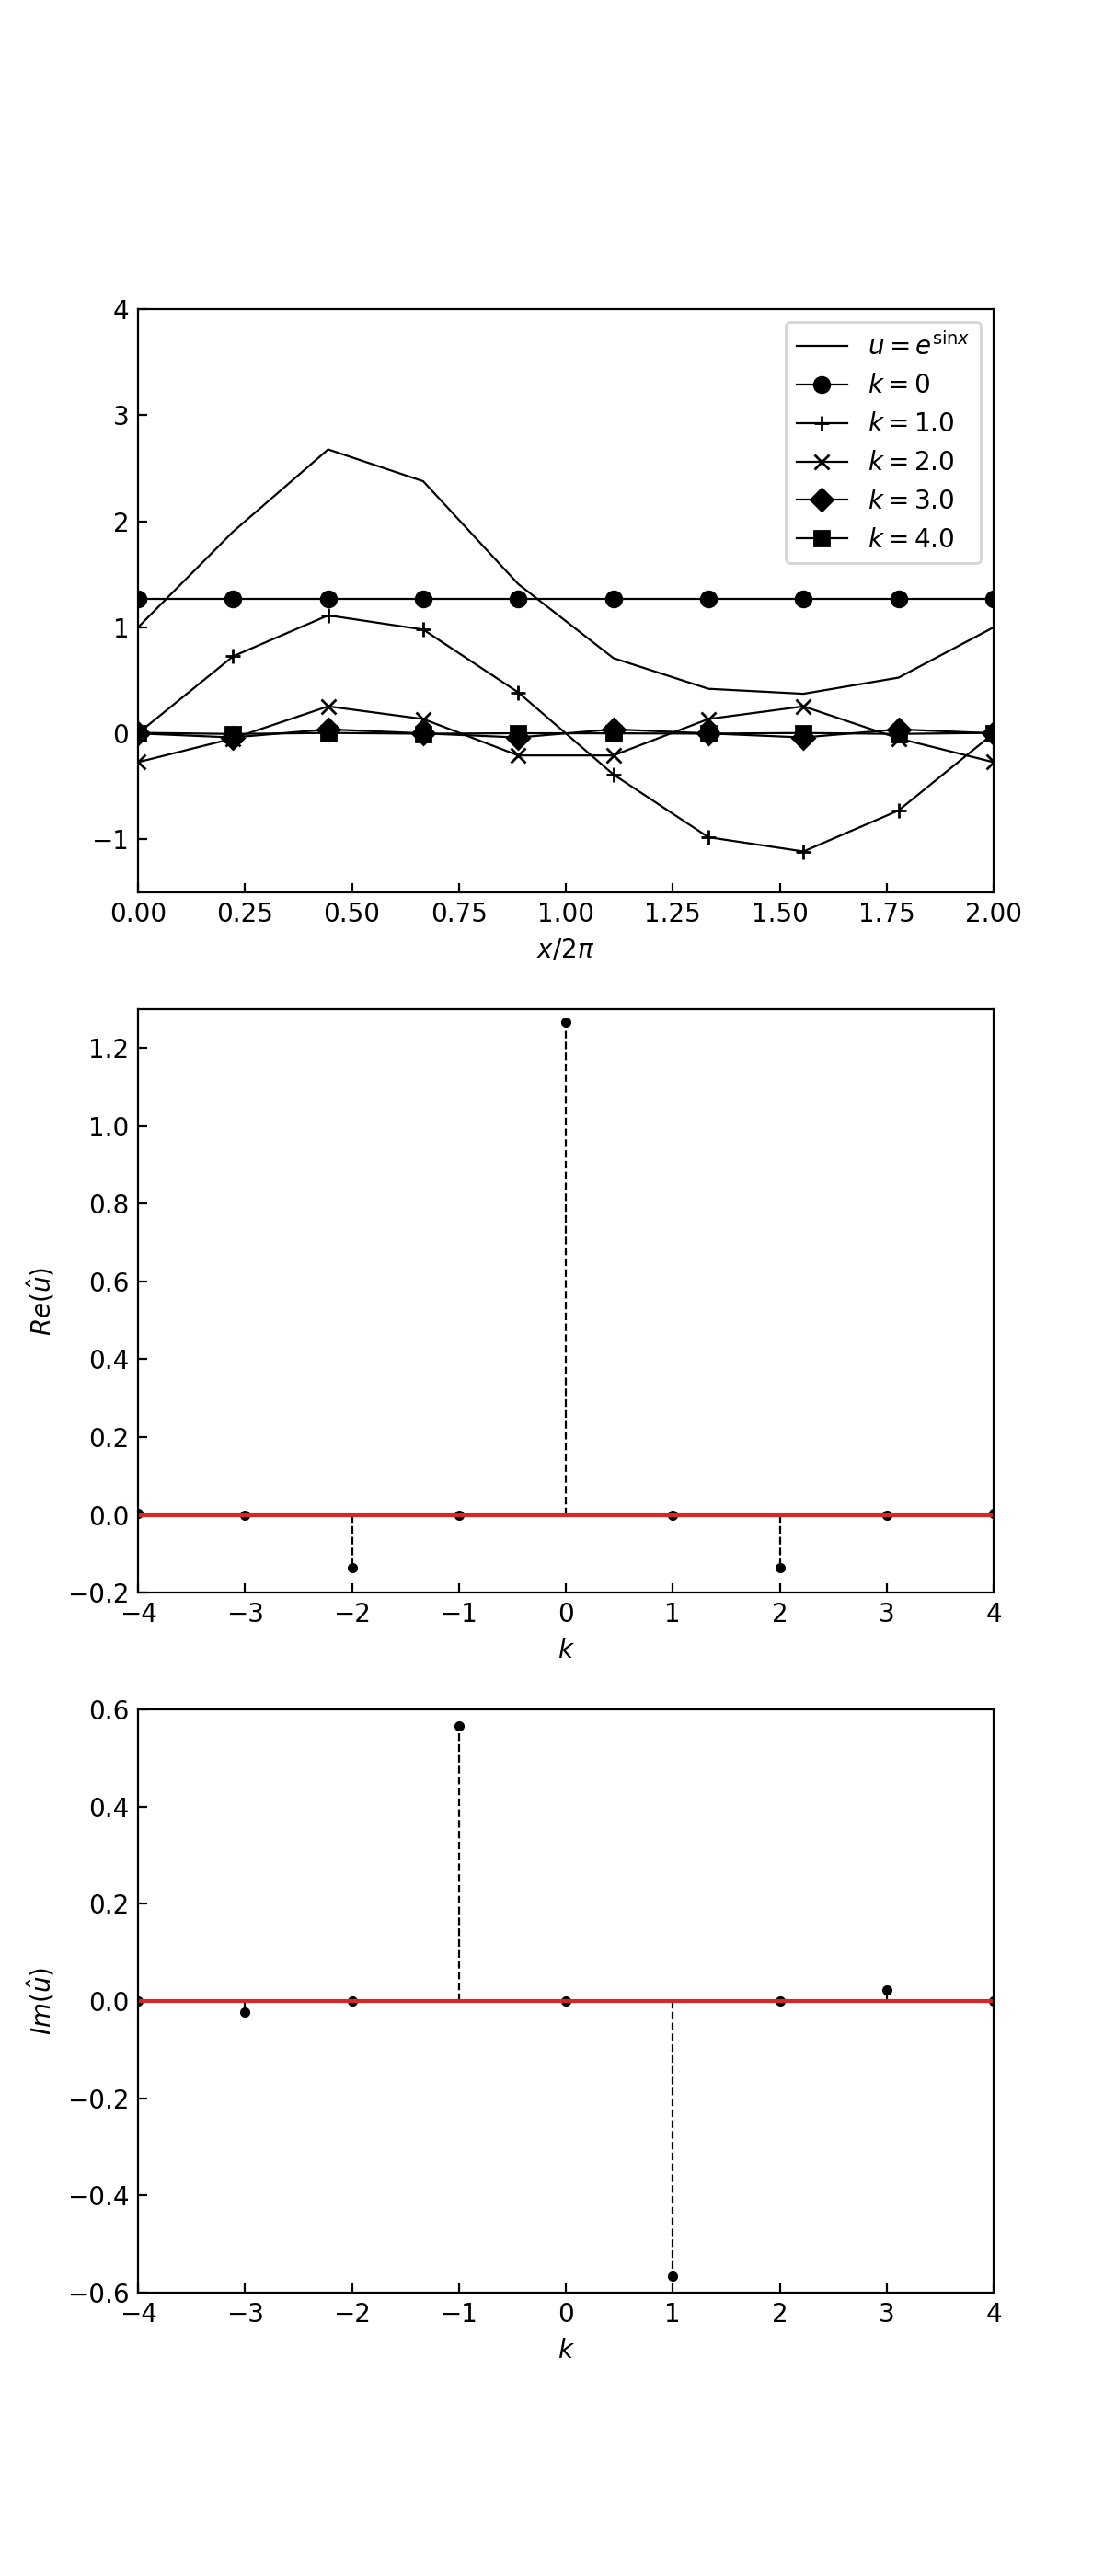

In [82]:
K = 4
N = 2*K + 1
x = np.linspace(0,2.*np.pi,N+1)
u = np.exp(np.sin(x))

# Perform the dft
wavenumber = generateWave(N)
uhat = dft_my(u,x,wavenumber)



plt.figure(figsize=(6,14))
plt.subplot(311)
plt.plot(x/np.pi,u,color='black',linewidth=0.8,label='$u=e^{\sin x}$')


marker = ["o","+","x","D","s"]
# Zero wavenumber
label = "$k=0$"
plt.plot(x/np.pi,np.ones_like(x)*uhat[4].real,color='black',marker=marker[0],label=label,markersize=6.,linewidth=0.8)

for k in range(5,N):
    uk  =  2.* uhat[k].real*np.cos(wavenumber[k]*x) 
    uk -=  2.*uhat[k].imag*np.sin(wavenumber[k]*x)
    label = "$k=" + str(wavenumber[k])+"$"
    plt.plot(x/np.pi,uk,color='black',marker=marker[k-4],
             markersize=6.,linewidth=0.8,label=label)
plt.xlim(0,2)
plt.ylim(-1.5,4.)

plt.tick_params(direction='in')
plt.xlabel('$x/2\pi$')
plt.legend()


plt.subplot(312)
markerline, stemlines, baseline = plt.stem(wavenumber,uhat[:].real)
plt.setp(markerline,color='black',markersize=3.)
plt.setp(stemlines,color='black',linestyle='--',linewidth=0.8)
plt.tick_params(direction='in')
plt.xlim(-4,4)
plt.ylim(-0.2,1.3)
plt.xlabel('$k$')
plt.ylabel('$Re(\hat{u})$')

plt.subplot(313)
markerline, stemlines, baseline = plt.stem(wavenumber,uhat[:].imag)
plt.setp(stemlines,color='black',linestyle='--',linewidth=0.8)
plt.setp(markerline,color='black',markersize=3.)
plt.xlabel('$k$')
plt.ylabel('$Im(\hat{u})$')
plt.xlim(-4,4)
plt.ylim(-0.6,0.6)
plt.tick_params(direction='in')

## Differentiation
As shown above, the function can be approximated by 
\begin{equation}
    u(x) \approx u_K(x) = \sum_{k=-K}^{K}\hat{u}_k e^{ikx}
\end{equation}
so we have a interpolator:
\begin{equation}
    p(x) = u_K(x) = \sum_{k=-K}^{K}\hat{u}_k e^{ikx}
\end{equation}
In addition , the differentiation can be computed
\begin{equation}
    p^{'}(x) = \sum_{k=-K}^{K}(ik)\hat{u}_k e^{ikx}
\end{equation}

<IPython.core.display.Javascript object>


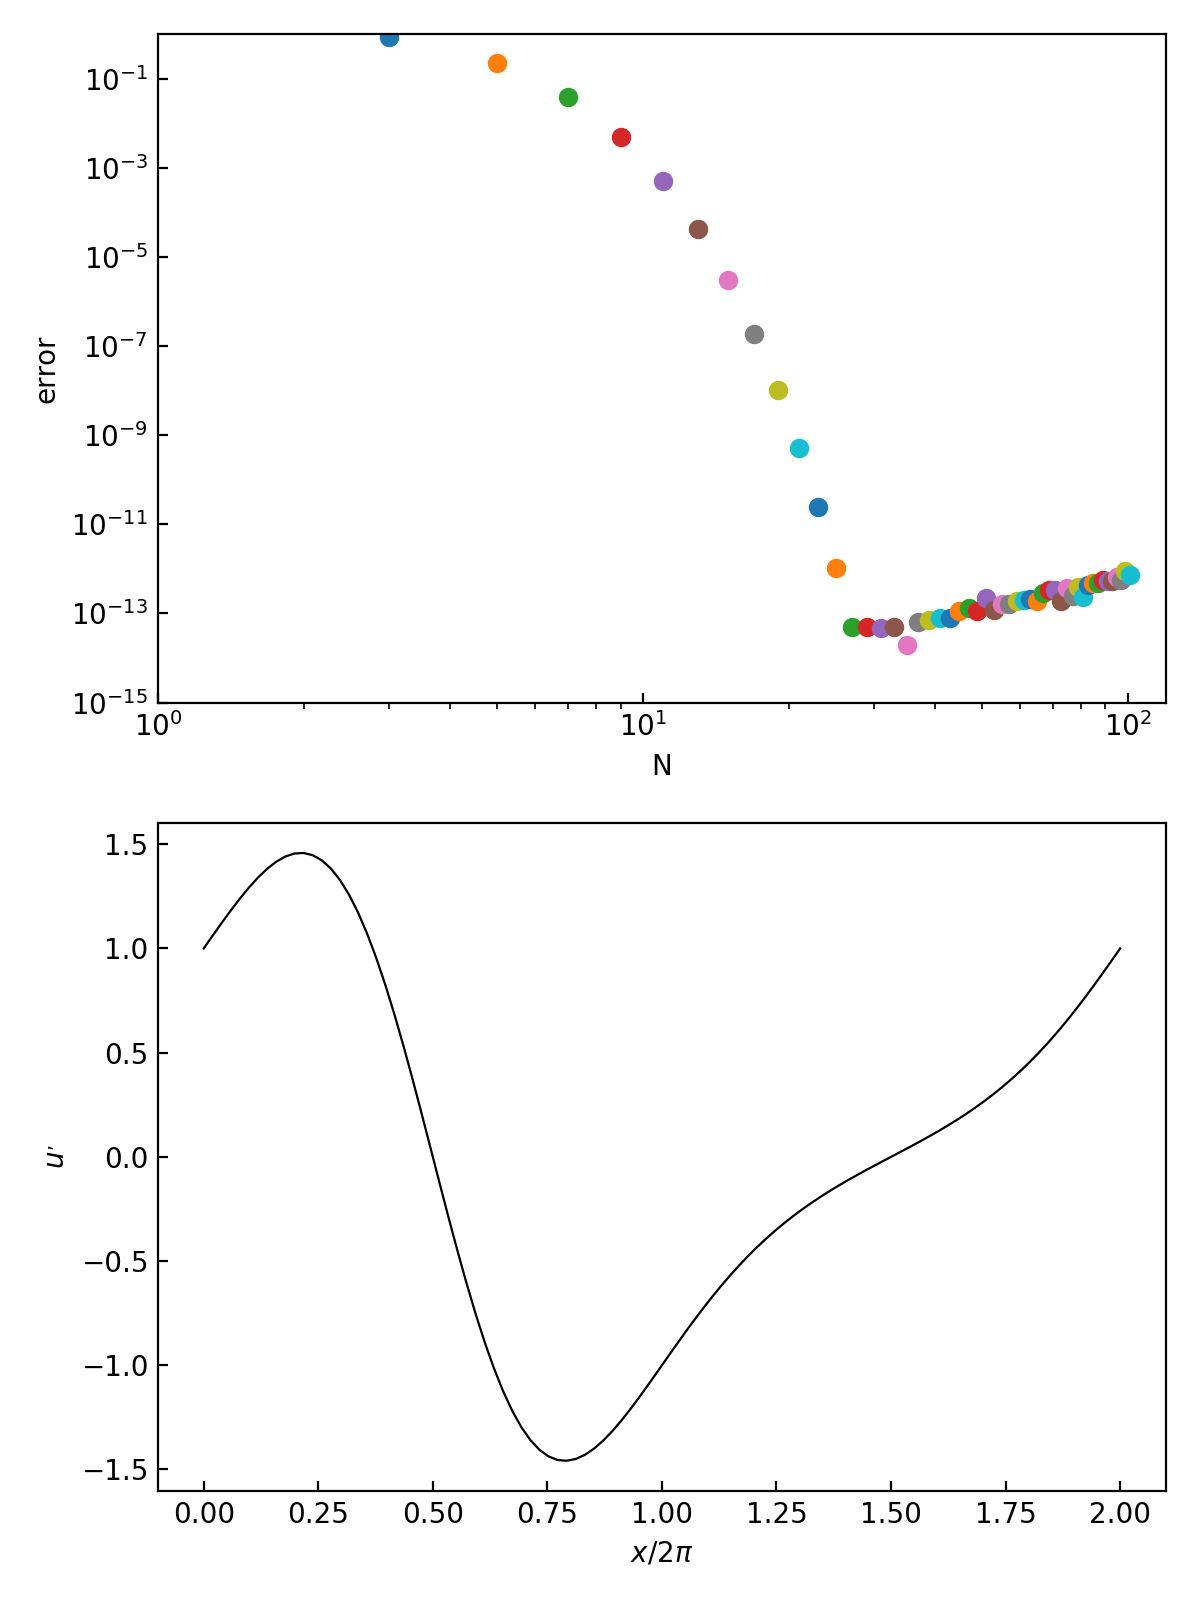

In [133]:
numTest = 50
Ktest = np.linspace(1,numTest,numTest,dtype=np.int)
plt.figure(figsize=(6,8))
plt.subplot(211)
for i in range(numTest):
    K = Ktest[i]
    N = 2*K + 1
    x = np.linspace(0,2.*np.pi,N+1)
    u = np.exp(np.sin(x))
    uprime = np.cos(x)*np.exp(np.sin(x))

    # Perform the dft
    wavenumber = generateWave(N)
    uhat = dft_my(u,x,wavenumber)
    what = 1j*wavenumber*uhat

    w = idft_my(what,wavenumber,x)
    
    error = np.max(np.abs(w.real-uprime))
    plt.scatter(N,error)
    
plt.semilogx()
plt.semilogy()
plt.xlim(1,120)
plt.ylim(1.e-15,1.)
plt.tick_params(direction='in')
plt.xlabel('N')
plt.ylabel('error')

plt.subplot(212)
plt.plot(x/np.pi,w.real,color='black',linewidth=0.8)
plt.tick_params(direction='in')
plt.xlabel('$x/2\pi$')
plt.ylabel('$u^{,}$')
plt.tight_layout()